# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./SINASC_RO_2019.csv',na_values='NA')
print(df.shape)

(27028, 69)


In [2]:
estado_civil_dict = { 1: 'Solteira',
                      2: 'Casada',
                      3: 'Viúva',
                      4: 'Separado judicialmente/Divorciado',
                      9: 'Ignorado'
                         }
type(estado_civil_dict)

dict

In [3]:
df['ESTCIVMAE'] = df['ESTCIVMAE'].map(estado_civil_dict)
df['ESTCIVMAE'].value_counts()

ESTCIVMAE
Casada                               9924
Solteira                             8952
Separado judicialmente/Divorciado     453
Ignorado                              145
Viúva                                  57
Name: count, dtype: int64

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

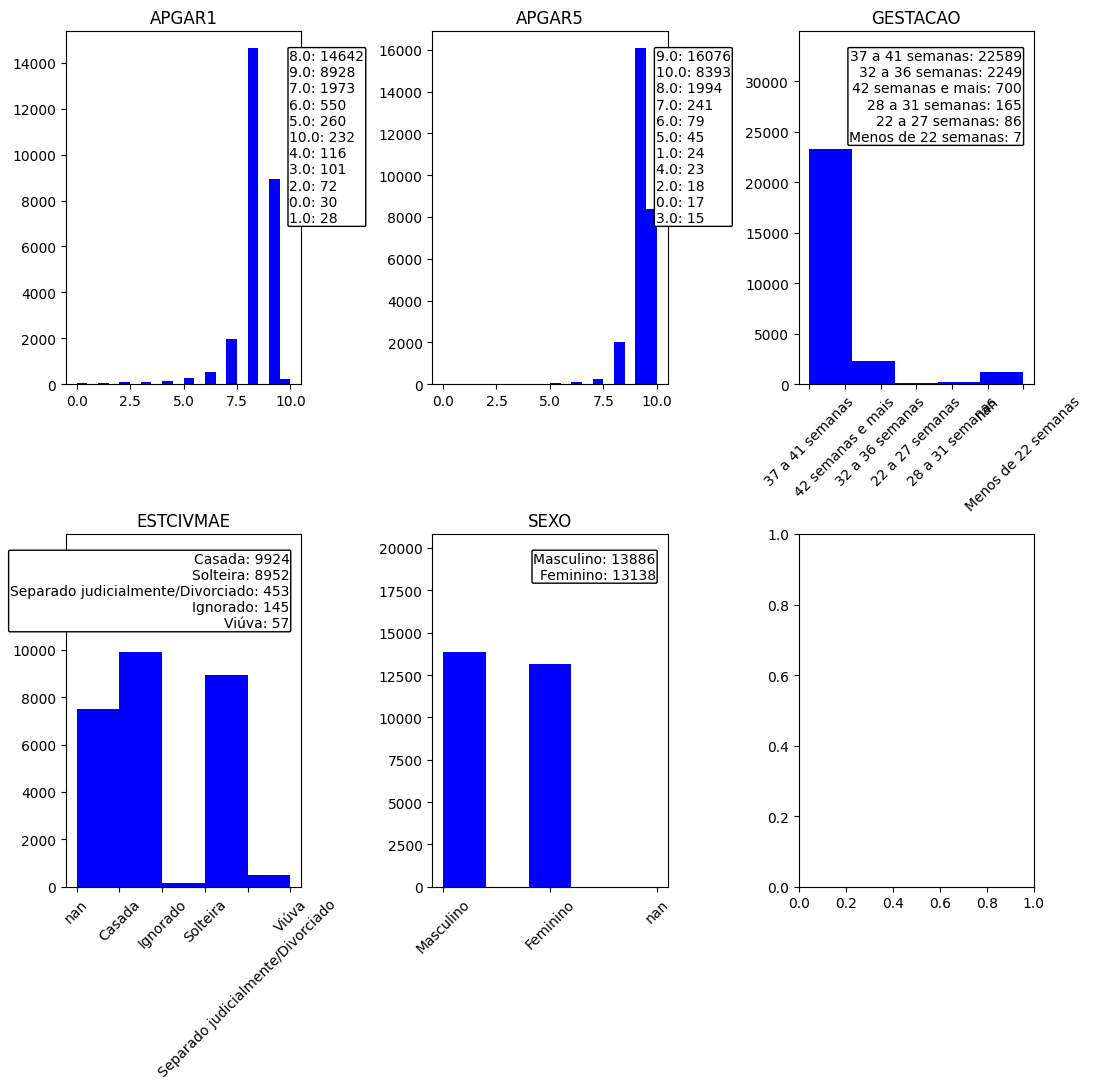

In [38]:
features1 = ['APGAR1', 'APGAR5', 'GESTACAO', 'ESTCIVMAE','SEXO']
def coord_generator(lin, col):
    cord =[]
    for i in range(lin):
        for j in range(col):
            cord.append(i)
            cord.append(j)
    return cord
def plotter(df, features):
    coor=[0,0,0,1,0,2,1,0,1,1]
    fig, axs = plt.subplots(2, 3, figsize=(11,11))
    k=0
    c=0
    
    for feature in features:        
        if df[feature].dtype == 'object':            
            counts, bins, patches = axs[coor[k], coor[k+1]].hist(df[feature].astype(str), bins=5)
            axs[coor[k],coor[k+1]].hist(df[feature].astype(str),bins=5,color='blue')
            axs[coor[k],coor[k+1]].tick_params(axis='x',labelrotation=45)
            axs[coor[k],coor[k+1]].set_title(feature)
            axs[coor[k], coor[k+1]].set_ylim(0, counts.max()*1.5)
            value_counts = df[feature].value_counts()
            summary_text = '\n'.join([f'{status}: {count}' for status, count in value_counts.items()])
            axs[coor[k],coor[k+1]].text(0.95, 0.95, summary_text,
                                        horizontalalignment='right', 
                                        verticalalignment='top', 
                                        transform=axs[coor[k],coor[k+1]].transAxes, 
                                        bbox=dict(facecolor='white', 
                                                  edgecolor='black', 
                                                  boxstyle='round,pad=0.1'))    
            k+=2                 
                                    
        else:
            value_counts = df[feature].value_counts()
            summary_text = '\n'.join([f'{status}: {count}' for status, count in value_counts.items()])
            axs[coor[k],coor[k+1]].hist(df[feature],bins=20,color='blue')
            axs[coor[k],coor[k+1]].set_title(feature)
            axs[coor[k],coor[k+1]].set_title(feature)
            axs[coor[k],coor[k+1]].text(0.95, 0.95, summary_text,
                                        horizontalalignment='left', 
                                        verticalalignment='top', 
                                        transform=axs[coor[k],coor[k+1]].transAxes, 
                                        bbox=dict(facecolor='white', 
                                                  edgecolor='black', 
                                                  boxstyle='round,pad=0.1'))
            k+=2
            
    plt.tight_layout()
    plt.show()   

plotter(df, features1)         
                

                

   


In [61]:
df['SEXO'].max()

TypeError: '>=' not supported between instances of 'str' and 'float'

In [63]:
df['SEXO'].value_counts()

SEXO
Masculino    13886
Feminino     13138
Name: count, dtype: int64

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

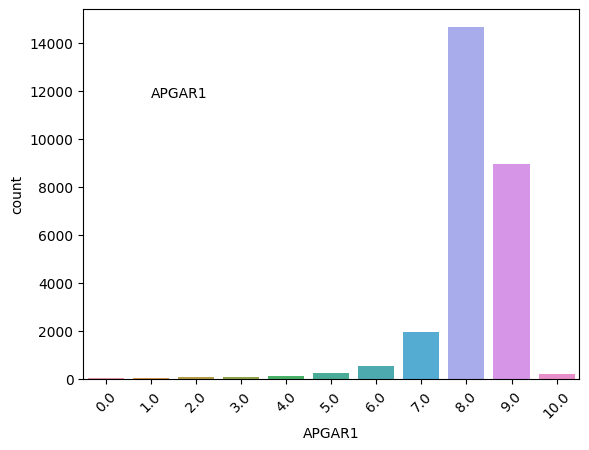

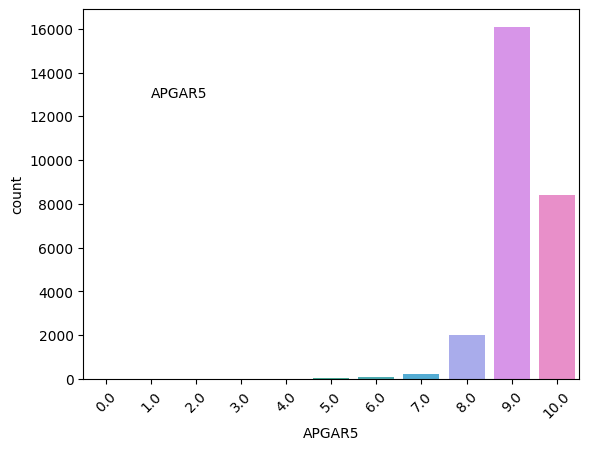

TypeError: '>=' not supported between instances of 'str' and 'float'

In [64]:
for feature in features1:
    x=df[feature].max()*0.1
    y=df[feature].value_counts().max()*0.8

    sns.countplot(x=feature,data=df)
    plt.text(x,y,feature)
    plt.xticks(rotation=45)
    plt.show()
    

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS